Name: Adithya

Reg No: BL.EN.U4AIE21003

Q1) Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

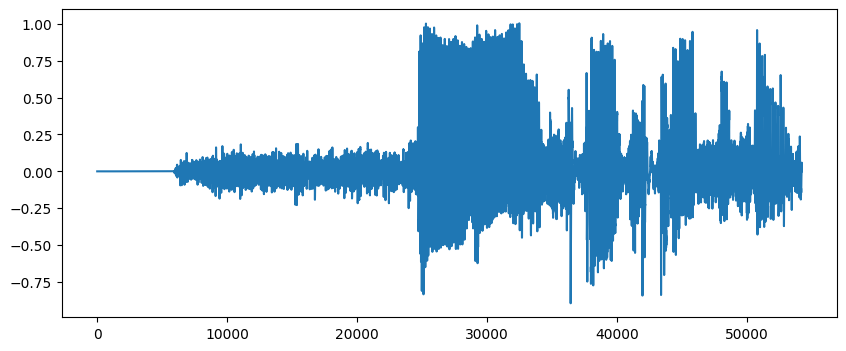

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
y,sr = librosa.load("adithya.wav")
plt.figure(figsize=(10,4))
plt.plot(y)

In [2]:
fft_ = np.fft.fft(y)
print(fft_)

[ -9.12164023-5.32907052e-15j  -8.39931832+1.25568909e+00j
  -5.63504855-4.93595155e-01j ... -16.59720415-4.09451144e-01j
  -5.63504855+4.93595155e-01j  -8.39931832-1.25568909e+00j]


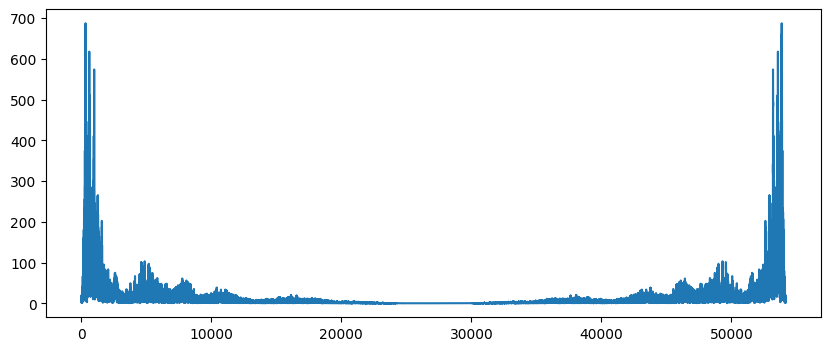

In [3]:
plt.figure(figsize=(10,4))
plt.plot(abs(fft_))

 Q2) Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal

Text(0.5, 1.0, 'Signal before')

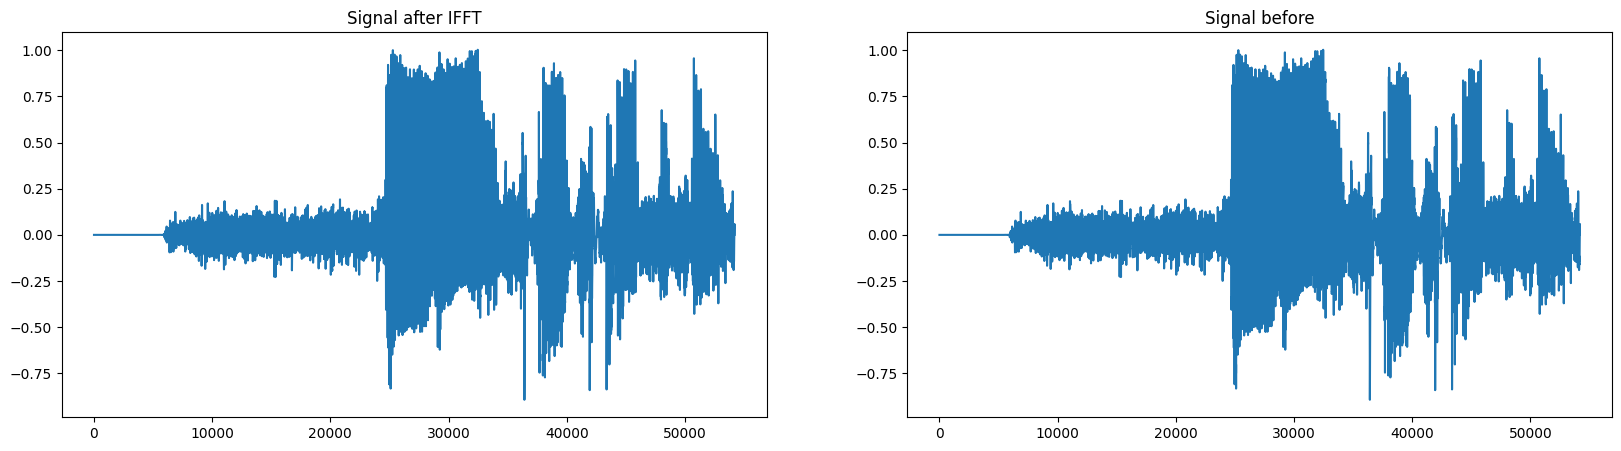

In [5]:
ifft_ = np.fft.ifft(fft_)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ifft_)
plt.title('Signal after IFFT')
plt.subplot(1,2,2)
plt.plot(y)
plt.title('Signal before')

 Q3) Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

In [7]:
from IPython.display import Audio
Audio("adithya.wav")
Audio(y[25000:52000],rate = sr)

Text(0.5, 1.0, 'FFT of the Word audio')

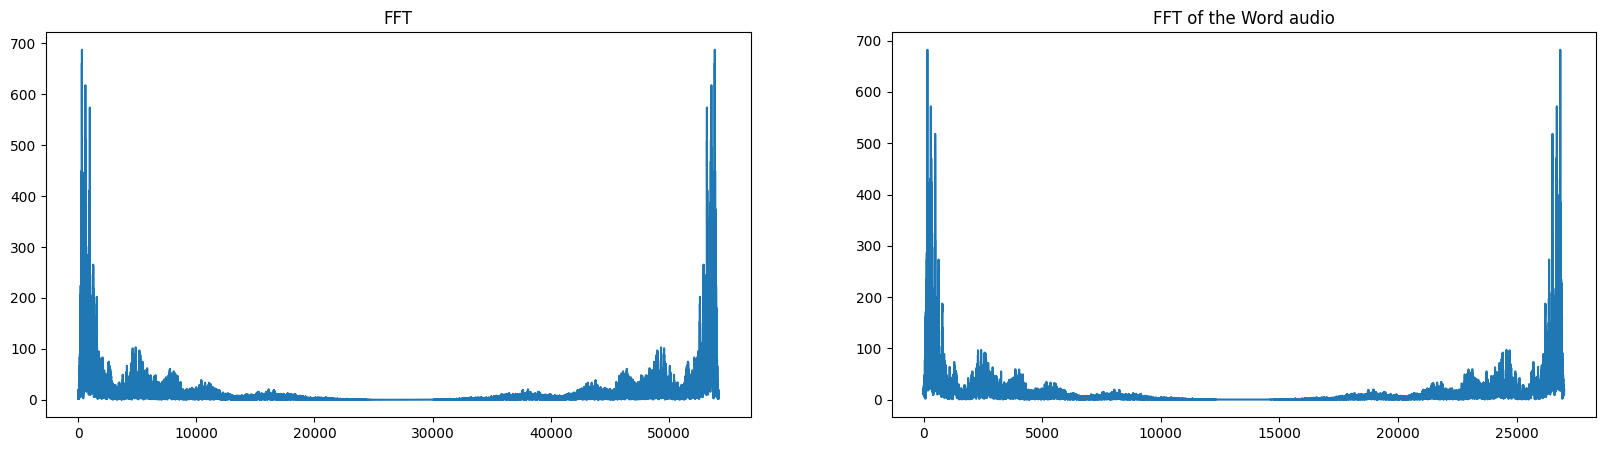

In [9]:
word = y[25000:52000]
word_fft = np.fft.fft(word)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.abs(fft_))
plt.title('FFT')
plt.subplot(1,2,2)
plt.plot(np.abs(word_fft))
plt.title('FFT of the Word audio')

Q4) Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

In [11]:
y_1,r = librosa.load("adithya.wav",sr = 22500)
Audio(y_1,rate = r)

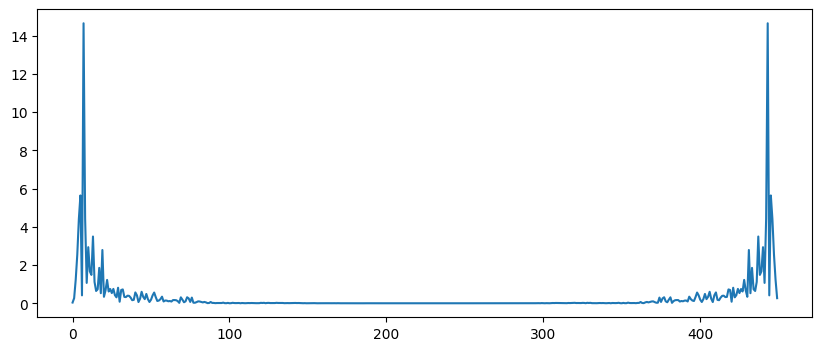

In [12]:
fft_2 = np.fft.fft(y_1[10000:10450])
plt.figure(figsize=(10,4))
plt.plot(abs(fft_2))

Q5) Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this

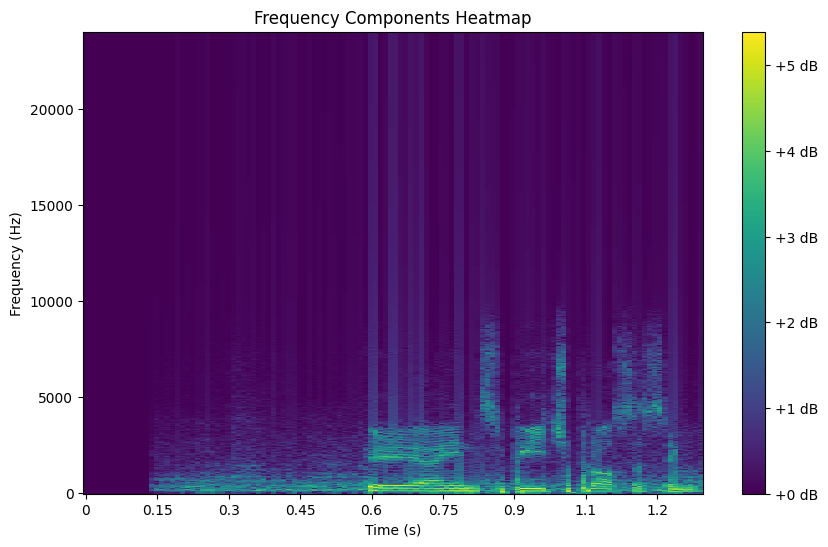

In [15]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
y2, sr = librosa.load('adithya.wav', sr=None)
window_length = 0.02
window_size = int(window_length * sr)
num_windows = len(y2) // window_size
freq_matrix = np.zeros((num_windows, window_size // 2 + 1))
for i in range(num_windows):
    start = i * window_size
    end = start + window_size
    windowed_signal = y2[start:end]
    freq_components = np.abs(np.fft.rfft(windowed_signal))
    freq_matrix[i, :] = freq_components

plt.figure(figsize=(10, 6))
librosa.display.specshow(np.log1p(freq_matrix.T), sr=sr, x_axis='time', y_axis='hz', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Frequency Components Heatmap')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


Q6) Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


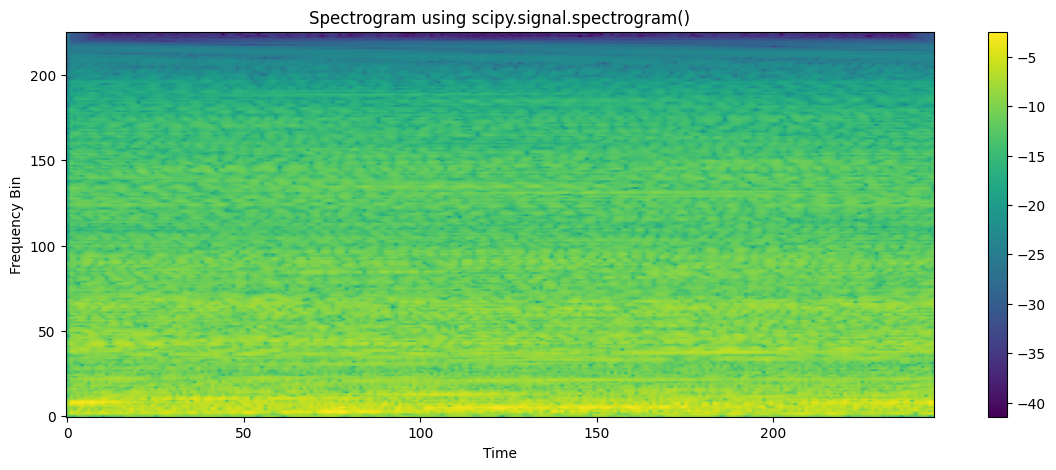

In [14]:
from scipy.signal import spectrogram
freq_spectogram, times_spectogram, spectrogram_matrix = spectrogram(y,22500)
plt.figure(figsize=(14, 5))
plt.imshow(np.log(spectrogram_matrix), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title("Spectrogram using scipy.signal.spectrogram()")
plt.xlabel("Time")
plt.ylabel("Frequency Bin")
plt.show()